In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Titanic Data set
df=pd.read_csv(r"C:\Users\aids1\Downloads\tested.csv",header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#In this dataset target variable is survied or not.it is binary classification problem

In [4]:
#By using the info method we know how  many non-null values and type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#by describe method we know the count,mean,standard deviation and five number summary of nu,erical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#to know the shape of data set we use shape method.shape method returns a tuple first value indicates the no.of rows and second one indicates the no.of columns
df.shape

(418, 12)

In [7]:
#columns sttribute returns the all column names that are present in the given dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
len(df['PassengerId'].unique())

418

######from step we can conclude that PassengerId is unique for every record.The functionality of index and PassengerID is same so we can drop PassengerID column.

In [9]:
df.drop(columns=['PassengerId'],inplace=True)

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

##### from above step we are counting the null values in each column.From above step we can conclude that null values are only present in cabin,Fare and age columns.

In [11]:
#Iam filling the null values present in the age column with mean age
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [13]:
#The value_counts method gives the count of each unique value in the given dataset
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

##### The cabin value is null in 327 records out of 418 recording.so we can handel this column in two ways
1.we can drop that column
2.we can fill with some value

In [14]:
#iam filling with M that indicates missing
df['Cabin'].fillna('M',inplace=True)

In [15]:
#As thier is only one null value in Fare column ,i want to fill the most frequent value,or we can drop it 
df["Fare"].fillna(df["Fare"].mode(),inplace=True)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       418 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     418 non-null    object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### categorical type columns are Name,Sex,Ticket,Cabin and Embarked

In [18]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [19]:
#gender is nomial data type ,so we can perfrom one-hot-encoding with get_dummies method present in pandas or we can replace with 0 or1
d=pd.get_dummies(df['Sex'],drop_first=True)

In [20]:
df=df.join(d['male'])

In [21]:
df.rename(columns={'male':'sex'},inplace=True)

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,M,Q,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,M,S,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,M,Q,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,M,S,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,M,S,0


In [23]:
df.drop(columns=['Sex'],inplace=True)

In [24]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,M,Q,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,M,S,0
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,M,Q,1
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,M,S,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,M,S,0


In [25]:
df["Ticket"].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [26]:
len(df["Ticket"].unique())

363

######from above step we can conclude that they are 363 unique values which cannot be handled by one-hot-encoding

In [27]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

#####from we can conclude that they are 3 differnt type of unique values in Embarked column.So we can perform one-hot-encoding

In [28]:
f=pd.get_dummies(df['Embarked'],drop_first=True)

In [29]:
df=df.join(f)

In [30]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,Q,S
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,M,Q,1,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,M,S,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,M,Q,1,1,0
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,M,S,1,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,M,S,0,0,1


In [31]:
df.drop(columns=['Embarked'],inplace=True)

In [32]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex,Q,S
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,M,1,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,M,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,M,1,1,0
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,M,1,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,M,0,0,1


##EXPLORATORY DATA ANALYSIS

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'sex', 'Q', 'S'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

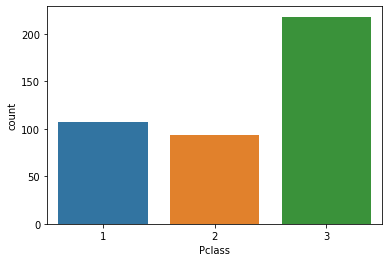

In [36]:
#To know which category of pclass are more
sns.countplot(x=df['Pclass'],data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

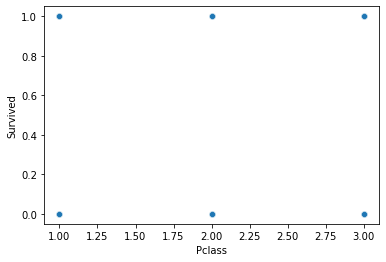

In [77]:
sns.scatterplot(x=df['Pclass'],y='Survived',data=df)

#####From above we can conclude that majority are belong to category 3

<AxesSubplot:xlabel='Survived', ylabel='Age'>

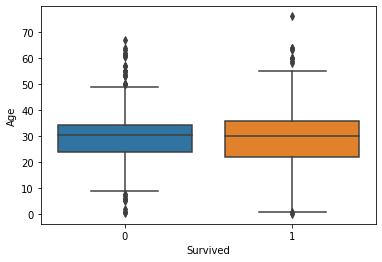

In [40]:
#To know whether are outliers in the Age column,we use boxplot
sns.boxplot(x='Survived',y='Age',data=df)

####From we can conclude that their are some outliers

<AxesSubplot:xlabel='sex', ylabel='count'>

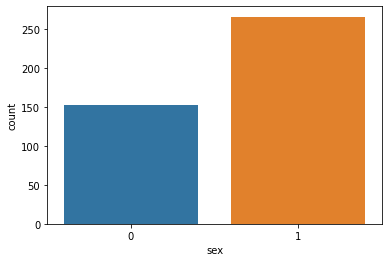

In [44]:
#To know how the count of males,and females 
sns.countplot(x="sex",data=df)

#####From above we conclude the majority of passengers belong to Male

<AxesSubplot:xlabel='sex', ylabel='Survived'>

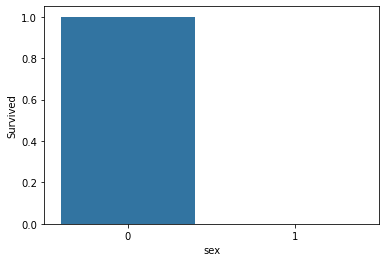

In [46]:
sns.barplot(x='sex',y='Survived',data=df)

<AxesSubplot:xlabel='sex', ylabel='Survived'>

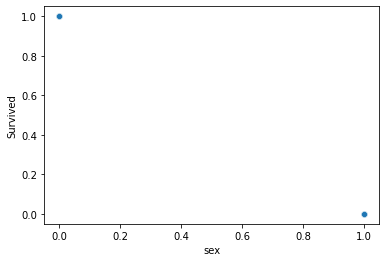

In [49]:
sns.scatterplot(x='sex',y='Survived',data=df)

####From above two plots we can conclude that majority of female are survived when compared to men